In [ ]:
# SEAS 6414 HW7 Robert Grados

In [ ]:
# Segmentation, Assignment Generation,
# and Churn Prediction Using Merchant Transaction
# Activity
# Dataset and Objective
# • Dataset: homework7 file1.csv
# • Data Description: This dataset contains records of merchant transactions, each
# with a unique merchant identifier, time of transaction, and amount in cents.
# • Objective: Analyze merchant transaction data to understand business growth
# and health. Preprocess the dataset for future transactions and generate specific
# features for each merchant

In [139]:
# **Q1
# Import pandas
import pandas as pd
import numpy as np
# Read the csv file with names parameter 
df = pd.read_csv("Downloads\homework7_file1.csv")
df.head(10)

,merchant,time,amount_usd_in_cents
0,d087d4c321,2034-12-11 22:16:41,5059
1,fe1cb2e840,2034-08-13 21:11:59,12743
2,878047f4b9,2033-06-05 21:15:00,7601
3,3932608d23,2034-04-28 19:55:01,5790
4,84a09b4188,2034-07-26 04:37:05,6153
5,ce54c1ba8f,2034-02-24 23:31:25,16030
6,c7ba9d4168,2033-12-17 08:49:27,8778
7,8d9f148cda,2033-02-26 00:33:00,6500
8,2cc274e632,2033-08-15 15:38:57,4880
9,1ddaea9838,2034-04-10 17:12:17,2437


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   merchant             100000 non-null  object
 1   time                 100000 non-null  object
 2   amount_usd_in_cents  100000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [167]:
df.head(10)

,merchant,time,amount_usd_in_cents
0,d087d4c321,2034-12-11 22:16:41,5059
1,fe1cb2e840,2034-08-13 21:11:59,12743
2,878047f4b9,2033-06-05 21:15:00,7601
3,3932608d23,2034-04-28 19:55:01,5790
4,84a09b4188,2034-07-26 04:37:05,6153
5,ce54c1ba8f,2034-02-24 23:31:25,16030
6,c7ba9d4168,2033-12-17 08:49:27,8778
7,8d9f148cda,2033-02-26 00:33:00,6500
8,2cc274e632,2033-08-15 15:38:57,4880
9,1ddaea9838,2034-04-10 17:12:17,2437


In [169]:
# Task 1: Feature Generation
# Generate the following features for each unique merchant:
# • trans amount min: Minimum transaction amount for each merchant.
# • trans amount max: Maximum transaction amount for each merchant.
# • trans amount avg: Average transaction amount for each merchant.
# • trans amount volume: Total transaction amount for each merchant.
# • trans frequency: Total count of transactions for each merchant.
# • trans recency: Recency of the last transaction (in days from 1/1/2035


# Convert transaction_date to datetime
df['time'] = pd.to_datetime(df['time'])

# Reference date for recency calculation
ref_date = pd.to_datetime('2035-01-01')

def calculate_merchant_features(df):
    result = df.groupby('merchant').agg(
        trans_amount_min=('amount_usd_in_cents', 'min'),
        trans_amount_max=('amount_usd_in_cents', 'max'),
        trans_amount_avg=('amount_usd_in_cents', 'mean'),
        trans_amount_volume=('amount_usd_in_cents', 'sum'),
        trans_frequency=('amount_usd_in_cents', 'count'),
        #trans_recency=(lambda x: (ref_date - x.max()).days),
        #avg_time_btwn_trans=(lambda x: x['transaction_date'].diff().mean().total_seconds() / 3600),  # Hours
        #avg_trans_growth_rate=(lambda x: x['transaction_amount'].pct_change().mean())
    )
    return result

merchant_features = calculate_merchant_features(df.copy())
merchant_features.head()
#print(merchant_features)

,trans_amount_min,trans_amount_max,trans_amount_avg,trans_amount_volume,trans_frequency
merchant,,,,,
00057d4302,1156,1279,1217.5000,2435,2
000ed1585f,21932,35784,28050.2500,112201,4
000f8c3297,3455,15047,6635.5625,106169,16
0020aefbd9,3589,3589,3589.0000,3589,1
0026f256ac,34880,34880,34880.0000,34880,1


In [ ]:
#  K-Means Clustering and Visualization

C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


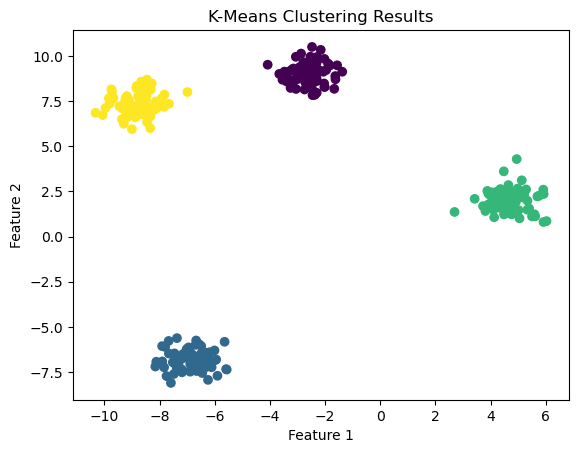

C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs 

# Scale the features (optional)
features = ['trans_amount_min', 'trans_amount_max', 'trans_amount_avg', 'trans_amount_volume','trans_frequency']
scaled_data = StandardScaler().fit_transform(merchant_features[features])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(merchant_features)

# Find optimal k (explore with silhouette and elbow methods)
optimal_k =4  # Replace with your determined value 

# Sample Data (Replace with your actual data, here the max number of samples is 7902)
X, y = make_blobs(n_samples=300, centers=optimal_k, cluster_std=0.6, random_state=42) 

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Visualize results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Results")
plt.show()



merchant_features['cluster_label'] = kmeans.fit_predict(scaled_features)

In [ ]:
# Silhouette Method

C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6154853461594691


C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7992801073745723


C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.8756469540734731


C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.7552173381897671


C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.6102030500466327


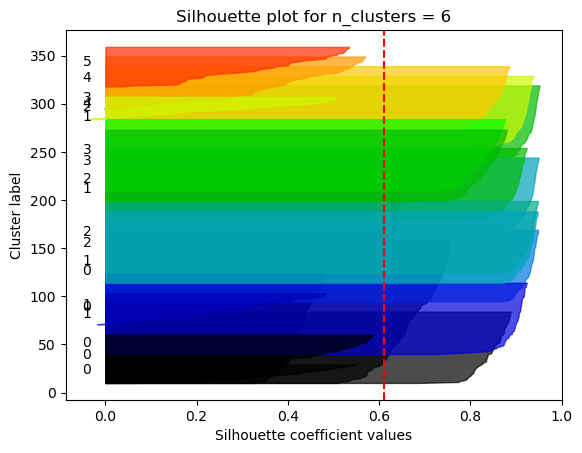

In [190]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Plot silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
         ith_cluster_silhouette_values.sort()
         size_cluster_i = ith_cluster_silhouette_values.shape[0]
         y_upper = y_lower + size_cluster_i

         color = cm.nipy_spectral(float(i) / n_clusters)
         plt.fill_betweenx(
             np.arange(y_lower, y_upper),
             0,
             ith_cluster_silhouette_values,
             facecolor=color,
             edgecolor=color,
             alpha=0.7,
         )
         plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
         y_lower = y_upper + 10  

plt.title("Silhouette plot for n_clusters = %d" % n_clusters)
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Vertical line for average silhouette score
plt.show() 

In [177]:
merchant_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7902 entries, 00057d4302 to fff1754102
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trans_amount_min     7902 non-null   int64  
 1   trans_amount_max     7902 non-null   int64  
 2   trans_amount_avg     7902 non-null   float64
 3   trans_amount_volume  7902 non-null   int64  
 4   trans_frequency      7902 non-null   int64  
 5   cluster_label        7902 non-null   int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 401.3+ KB


In [ ]:
# Elbow Method

C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

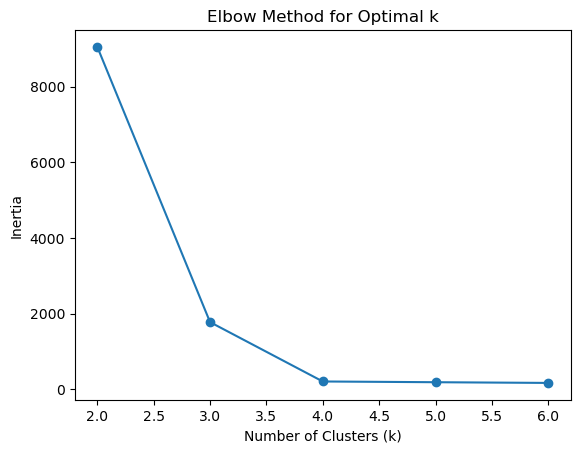

In [191]:
from sklearn.cluster import KMeans

inertias = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_) 

plt.plot(range_n_clusters, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [212]:
df.groupby('merchant')['time'].max()[:].unique()

<DatetimeArray>
['2033-05-30 04:20:31', '2034-07-10 15:57:48', '2034-11-03 12:56:38',
 '2034-05-30 21:55:06', '2033-09-15 01:17:32', '2034-10-14 13:29:42',
 '2034-12-23 02:23:14', '2034-05-23 12:19:34', '2033-12-18 05:14:14',
 '2034-09-16 20:23:49',
 ...
 '2034-02-09 21:48:20', '2034-08-19 19:09:36', '2034-12-06 20:39:24',
 '2033-03-19 21:09:42', '2034-03-07 11:19:40', '2034-12-30 01:24:24',
 '2034-04-27 13:18:08', '2033-12-18 03:20:59', '2034-08-16 14:58:20',
 '2034-09-18 22:59:40']
Length: 7902, dtype: datetime64[ns]

In [ ]:
# Churn Label Generation
# Churn Prediction
# • Background: Customer retention is a key growth pillar. Churn or customer
# attrition is defined as customers who have had no transactions within a 30-day
# period, indicating a ”rolling” Monthly Recurring Revenue (MRR) of $0.
# • Goal: Develop a churn prediction model.


In [219]:
#  Generate binary labels for churn and no churn based on the 30-day inactivity
#  criterion.
import pandas as pd

# Convert transaction_date to datetime
df['time'] = pd.to_datetime(df['time'])

# Reference date for recency calculation
ref_date = pd.to_datetime('2035-01-01')

def calculate_churn(df):
    # Set reference date for analysis
    ref_date = pd.to_datetime('2035-01-01')  # Or a specific date
    # Calculate churn status
    last_transaction_date = df.groupby('merchant')['time'].max()
    #print("churn func: last Transaction date:",last_transaction_date)

    churn_period = pd.Timedelta(days=30) # 
    df['churn'] = (ref_date - last_transaction_date) > churn_period
    print('ref_date:',ref_date,'last trans:', last_transaction_date, 'churn_period =',churn_period)
    return df 

# Apply the function to your DataFrame
df_with_churn = calculate_churn(df.copy())
print(df_with_churn)

ref_date: 2035-01-01 00:00:00 last trans: merchant
00057d4302   2033-05-30 04:20:31
000ed1585f   2034-07-10 15:57:48
000f8c3297   2034-11-03 12:56:38
0020aefbd9   2034-05-30 21:55:06
0026f256ac   2033-09-15 01:17:32
                     ...        
ffb94e1865   2034-12-30 01:24:24
ffc46fd720   2034-04-27 13:18:08
ffe1f6b51a   2033-12-18 03:20:59
ffe26b900d   2034-08-16 14:58:20
fff1754102   2034-09-18 22:59:40
Name: time, Length: 7902, dtype: datetime64[ns] churn_period = 30 days 00:00:00
         merchant                time  amount_usd_in_cents churn
0      d087d4c321 2034-12-11 22:16:41                 5059   NaN
1      fe1cb2e840 2034-08-13 21:11:59                12743   NaN
2      878047f4b9 2033-06-05 21:15:00                 7601   NaN
3      3932608d23 2034-04-28 19:55:01                 5790   NaN
4      84a09b4188 2034-07-26 04:37:05                 6153   NaN
...           ...                 ...                  ...   ...
99995  0a309e574d 2034-05-26 14:35:28              

In [220]:
pd.Timedelta(days=30)

Timedelta('30 days 00:00:00')

In [221]:
df.groupby('merchant')['time'].max()

merchant
00057d4302   2033-05-30 04:20:31
000ed1585f   2034-07-10 15:57:48
000f8c3297   2034-11-03 12:56:38
0020aefbd9   2034-05-30 21:55:06
0026f256ac   2033-09-15 01:17:32
                     ...        
ffb94e1865   2034-12-30 01:24:24
ffc46fd720   2034-04-27 13:18:08
ffe1f6b51a   2033-12-18 03:20:59
ffe26b900d   2034-08-16 14:58:20
fff1754102   2034-09-18 22:59:40
Name: time, Length: 7902, dtype: datetime64[ns]

In [223]:
 (ref_date - df.groupby('merchant')['time'].max())

merchant
00057d4302   580 days 19:39:29
000ed1585f   174 days 08:02:12
000f8c3297    58 days 11:03:22
0020aefbd9   215 days 02:04:54
0026f256ac   472 days 22:42:28
                    ...       
ffb94e1865     1 days 22:35:36
ffc46fd720   248 days 10:41:52
ffe1f6b51a   378 days 20:39:01
ffe26b900d   137 days 09:01:40
fff1754102   104 days 01:00:20
Name: time, Length: 7902, dtype: timedelta64[ns]

In [224]:
 (ref_date - df.groupby('merchant')['time'].max()) > pd.Timedelta(days=30)

merchant
00057d4302     True
000ed1585f     True
000f8c3297     True
0020aefbd9     True
0026f256ac     True
              ...  
ffb94e1865    False
ffc46fd720     True
ffe1f6b51a     True
ffe26b900d     True
fff1754102     True
Name: time, Length: 7902, dtype: bool

In [240]:
pp=  (ref_date - df.groupby('merchant')['time'].max()) > pd.Timedelta(days=30)

In [227]:
 (ref_date - df.groupby('merchant')['time'].max()) > pd.Timedelta(days=30)

merchant
00057d4302     True
000ed1585f     True
000f8c3297     True
0020aefbd9     True
0026f256ac     True
              ...  
ffb94e1865    False
ffc46fd720     True
ffe1f6b51a     True
ffe26b900d     True
fff1754102     True
Name: time, Length: 7902, dtype: bool

In [241]:
type(pp)

pandas.core.series.Series

In [237]:
df.head()

,merchant,time,amount_usd_in_cents,churn
0,d087d4c321,2034-12-11 22:16:41,5059,NaN
1,fe1cb2e840,2034-08-13 21:11:59,12743,NaN
2,878047f4b9,2033-06-05 21:15:00,7601,NaN
3,3932608d23,2034-04-28 19:55:01,5790,NaN
4,84a09b4188,2034-07-26 04:37:05,6153,NaN


In [216]:
df_with_churn.churn.value_counts()

churn
True    100000
Name: count, dtype: int64

In [ ]:
# Use the generated features and any algorithm(s) of your choice for the model.
# Present metrics from your experiments and feature importance.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

features = ['recency', 'frequency', 'avg_transaction_amount'] 
X = df_with_churn[features] 
y = df_with_churn['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train) 

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)

In [198]:
df_with_churn.head()

,merchant,time,amount_usd_in_cents,churn
0,d087d4c321,2034-12-11 22:16:41,5059,NaN
1,fe1cb2e840,2034-08-13 21:11:59,12743,NaN
2,878047f4b9,2033-06-05 21:15:00,7601,NaN
3,3932608d23,2034-04-28 19:55:01,5790,NaN
4,84a09b4188,2034-07-26 04:37:05,6153,NaN


C:\Users\1126692\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


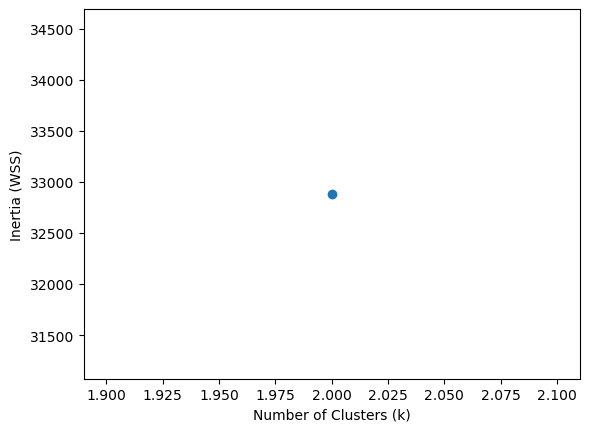

In [178]:
from sklearn.cluster import KMeans

inertias = []  # Store inertia values

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

# Plot inertia vs. number of clusters 
plt.plot(range_n_clusters, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WSS)")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3] # [2, 3, 4, 5, 6]  # Range of clusters to test

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_features)  # Assuming scaled_features is your scaled data

    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Plot average silhouette score vs. number of clusters 
    plt.plot(range_n_clusters, silhouette_avg, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Average Silhouette Score")
    plt.show()

In [171]:
for cluster in merchant_features['cluster_label'].unique():
    subset = merchant_features[merchant_features['cluster_label'] == cluster]
    print(f"\nCluster {cluster} Characteristics:")
    print(subset.describe())


Cluster 0 Characteristics:
       trans_amount_min  trans_amount_max  trans_amount_avg  \
count       7526.000000       7526.000000       7526.000000   
mean       12633.295908      32646.742626      19104.379985   
std        26994.414397      49805.035290      30308.187866   
min          201.000000        209.000000        209.000000   
25%         2062.000000       6319.000000       4711.333333   
50%         4157.500000      14120.000000       8489.482759   
75%         9856.000000      34816.000000      18396.150000   
max       251537.000000     415762.000000     251537.000000   

       trans_amount_volume  trans_frequency  cluster_label  
count         7.526000e+03      7526.000000         7526.0  
mean          1.137870e+05         9.466649            0.0  
std           2.203491e+05        22.946180            0.0  
min           2.090000e+02         1.000000            0.0  
25%           9.649500e+03         1.000000            0.0  
50%           3.069000e+04         3.0

In [57]:
print("**Q1: Average Transaction amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].mean()


**Q1: Average Transaction amount for each merchant :


merchant
00057d4302     1217.500000
000ed1585f    28050.250000
000f8c3297     6635.562500
0020aefbd9     3589.000000
0026f256ac    34880.000000
                  ...     
ffb94e1865     7484.969432
ffc46fd720     2760.000000
ffe1f6b51a     5462.666667
ffe26b900d    21610.000000
fff1754102    10415.500000
Name: amount_usd_in_cents, Length: 7902, dtype: float64

In [76]:
# • trans amount volume: Total transaction amount for each merchant.
print("**Q1: Total transaction amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].sum()

**Q1: Total transaction amount for each merchant :


merchant
00057d4302       2435
000ed1585f     112201
000f8c3297     106169
0020aefbd9       3589
0026f256ac      34880
               ...   
ffb94e1865    1714058
ffc46fd720       2760
ffe1f6b51a      16388
ffe26b900d      43220
fff1754102      20831
Name: amount_usd_in_cents, Length: 7902, dtype: int64

In [74]:
# • trans frequency: Total count of transactions for each merchant.
print("**Q1: Total count of transactions for each merchant. :")
df['merchant'].value_counts()

**Q1: Total count of transactions for each merchant. :


merchant
5608f200cf    1673
53b3fbeae2     817
1ddaea9838     788
89e2d29885     770
654930c922     744
              ... 
a116546ac7       1
624bca636b       1
bdaadcce74       1
2418cf4d4c       1
d6a42186fa       1
Name: count, Length: 7902, dtype: int64

In [278]:
# • trans recency: Recency of the last transaction (in days from 1/1/2035).
print("**Q1: Recency of the last transaction (in days from 1/1/2035 :")
date_now = pd.to_datetime('1/1/2035 00:00')
trans_recency = (date_now - pd.to_datetime(df.time.max())).total_seconds()//3600
print("**Q1: Recency of the last transaction in hours: ", trans_recency)
type(trans_recency)

**Q1: Recency of the last transaction (in days from 1/1/2035 :
**Q1: Recency of the last transaction in hours:  16.0


float

In [208]:
# • trans recency: Recency of the last transaction (in days from 1/1/2035).
print("**Q1: Recency of the last transaction (in days from 1/1/2035 :")
date_now = pd.to_datetime('1/1/2035 00:00')
trans_recency = (date_now - pd.to_datetime(df.time.max())).total_seconds()//3600
print("**Q1: Recency of the last transaction in hours: ", trans_recency)
type(trans_recency)


**Q1: Recency of the last transaction (in days from 1/1/2035 :
**Q1: Recency of the last transaction in hours:  16.0


float

In [314]:
# • avg time btwn trans: Average time between transactions (in hours).
data[0:0]
data = df[['merchant','time']].copy()
print(data)
data1 = df.sort_values(by=['time'], ascending=False)
data = data1[['merchant','time']].copy()
print("**Q1: sorted data frame with only merchant and time columns:")
print(data)
data['delta'] = pd.to_datetime(data['time']).diff(-1)
print("**Q1: print delta :")
print(data)
#avg_time_btwn_trans = data.delta.mean().total_seconds() / 3600
print('**Q1: avg_time_btwn_trans in hours:')
print(avg_time_btwn_trans )

         merchant                 time
0      d087d4c321  2034-12-11 22:16:41
1      fe1cb2e840  2034-08-13 21:11:59
2      878047f4b9  2033-06-05 21:15:00
3      3932608d23  2034-04-28 19:55:01
4      84a09b4188  2034-07-26 04:37:05
...           ...                  ...
99995  0a309e574d  2034-05-26 14:35:28
99996  e9d9eacb17  2033-02-22 04:17:02
99997  d6fe440e06  2033-12-26 18:52:50
99998  4367df3b1e  2034-02-01 05:31:12
99999  59adb5bff8  2034-05-24 21:53:23

[100000 rows x 2 columns]
**Q1: sorted data frame with only merchant and time columns:
         merchant                 time
17644  913696f5ff  2034-12-31 07:55:58
73444  7851aedb5b  2034-12-31 07:27:21
83787  164ba405db  2034-12-31 07:14:04
8031   de9e4801de  2034-12-31 06:55:16
5128   f7ba9d03d4  2034-12-31 06:54:38
...           ...                  ...
26065  878047f4b9  2033-01-01 23:49:57
90334  81512d8413  2033-01-01 22:45:05
41799  a8ff2d667e  2033-01-01 18:39:19
91736  32cd721943  2033-01-01 16:57:21
70995  81512d84

In [418]:
# • avg trans growth rate: Average growth rate in transaction amounts
#import numpy as np
from scipy.stats import linregress
print("**Q1:Average growth rate amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: linregress(range(len(x)),x)[0] if len(x) >1 else 1)

**Q1:Average growth rate amount for each merchant :


merchant
00057d4302     -123.000000
000ed1585f      542.700000
000f8c3297     -265.733824
0020aefbd9        1.000000
0026f256ac        1.000000
                  ...     
ffb94e1865       -5.851684
ffc46fd720        1.000000
ffe1f6b51a       63.500000
ffe26b900d   -15428.000000
fff1754102    -2595.000000
Name: amount_usd_in_cents, Length: 7902, dtype: float64

In [102]:
import pandas as pd

data = {
    'merchant_id': [1001, 1002, 1001, 1001, 1003, 1002, 1003],
    'transaction_amount': [50, 120, 80, 35, 250, 95, 170],
    'transaction_date': [
        '2023-10-12', '2023-11-01', '2023-10-25', '2023-09-15', '2023-12-10', '2023-11-15', '2023-12-01'
    ]
}
df = pd.DataFrame(data)

In [104]:
df.head()

,merchant_id,transaction_amount,transaction_date
0,1001,50,2023-10-12
1,1002,120,2023-11-01
2,1001,80,2023-10-25
3,1001,35,2023-09-15
4,1003,250,2023-12-10


In [114]:
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Reference date for recency calculation
ref_date = pd.to_datetime('2035-01-01')

def calculate_merchant_features(df):
    result = df.groupby(['merchant_id']).agg(
        trans_amount_min:=('transaction_amount_min', 'min'),
        trans_amount_max:=('transaction_amount_max', 'max'),
        trans_amount_avg:=('transaction_amount_mean', 'mean'),
        trans_amount_volume:=('transaction_amount_sum', 'sum'),
        trans_frequency:=('transaction_amount_count', 'count'),
        trans_recency:=(lambda x: (ref_date - x.max()).days)
    )
    return result

merchant_features = calculate_merchant_features(df.copy())
#print(merchant_features)

AttributeError: 'SeriesGroupBy' object has no attribute 'transaction_amount_min'

In [ ]:
# Q2
# You are provided with two datasets: sales data.csv and product info.csv.
# • sales data.csv contains transaction records with columns: ’TransactionID’,
# ’ProductID’, ’Date’, ’Quantity’, and ’Price’.
# • product info.csv contains product details with columns: ’ProductID’, ’ProductName’, ’Category’.
# Your task involves multiple steps of data manipulation using Pandas and NumPy to
# extract insights from these datasets

In [421]:
# Tasks:
# 1. Data Loading and Merging:
# • Load both datasets using Pandas.
# • Merge them into a single DataFrame on ’ProductID’.

# **Q2
# Import pandas
import pandas as pd
# Read the csv file with names parameter 
df_sales = pd.read_csv("Downloads\sales_data.csv")
df_prodinfo = pd.read_csv("Downloads\product_info.csv")
productId = 
df_sales
df_prodinfo


,ProductID,ProductName,Category
0,100,not,Clothing
1,101,ready,Clothing
2,102,fill,Books
3,103,avoid,Clothing
4,104,beyond,Toys
...,...,...,...
95,195,just,Clothing
96,196,personal,Books
97,197,human,Books
98,198,accept,Books


In [422]:
df_sales

,TransactionID,ProductID,Date,Quantity,Price
0,1,136,2023-03-13,8,245.288680
1,2,121,2023-06-09,2,355.603776
2,3,179,2023-04-18,7,25.393345
3,4,142,2023-09-03,10,260.758110
4,5,101,2023-06-21,1,212.490775
...,...,...,...,...,...
9995,9996,136,2023-01-30,7,29.294954
9996,9997,160,2023-05-23,1,96.704246
9997,9998,122,2023-07-14,10,175.151577
9998,9999,116,2023-03-25,10,337.270736


In [428]:
# 2. Data Cleaning:
# • Check for and handle any missing values in the merged dataset.
# • Convert the ’Date’ column to a DateTime object.

Merged_TransID = df_sales.merge(df_prodinfo)
Merged_TransID.tail(10)

,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category
9990,8984,180,2023-11-08,5,198.663536,hard,Home Appliances
9991,9279,180,2023-09-08,9,487.800004,hard,Home Appliances
9992,9321,180,2023-09-21,3,240.528640,hard,Home Appliances
9993,9452,180,2023-09-27,1,487.558037,hard,Home Appliances
9994,9502,180,2023-04-23,3,467.342151,hard,Home Appliances
9995,9538,180,2023-06-16,2,372.986276,hard,Home Appliances
9996,9548,180,2023-05-16,9,305.627015,hard,Home Appliances
9997,9606,180,2023-06-25,10,130.088985,hard,Home Appliances
9998,9723,180,2023-09-06,1,390.264315,hard,Home Appliances
9999,9929,180,2023-04-10,4,158.165213,hard,Home Appliances


In [429]:
print(Merged_TransID)

      TransactionID  ProductID        Date  Quantity       Price ProductName  \
0                 1        136  2023-03-13         8  245.288680        pull   
1                92        136  2023-07-02         6   21.266893        pull   
2               260        136  2023-04-15         2  356.242853        pull   
3               411        136  2023-08-21         2   91.071146        pull   
4               479        136  2023-03-02        10  331.557053        pull   
...             ...        ...         ...       ...         ...         ...   
9995           9538        180  2023-06-16         2  372.986276        hard   
9996           9548        180  2023-05-16         9  305.627015        hard   
9997           9606        180  2023-06-25        10  130.088985        hard   
9998           9723        180  2023-09-06         1  390.264315        hard   
9999           9929        180  2023-04-10         4  158.165213        hard   

             Category  
0              

In [432]:
# • Convert the ’Date’ column to a DateTime object.
# Merged_TransID.Date = Merged_TransID.Date.apply(lambda x: pd.to_datetime(x))
Merged_TransID.Date.apply(lambda x: pd.to_datetime(x))

0      2023-03-13
1      2023-07-02
2      2023-04-15
3      2023-08-21
4      2023-03-02
          ...    
9995   2023-06-16
9996   2023-05-16
9997   2023-06-25
9998   2023-09-06
9999   2023-04-10
Name: Date, Length: 10000, dtype: datetime64[ns]

In [437]:
# 3. Data Analysis using Slicing and Indexing:
# • Create a new column ’TotalSale’, calculated as ’Quantity’ * ’Price’.
Merged_TransID['TotalSale'] =Merged_TransID.Quantity * Merged_TransID.Price
Merged_TransID



,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category,TotalSale
0,1,136,2023-03-13,8,245.288680,pull,Toys,1962.309438
1,92,136,2023-07-02,6,21.266893,pull,Toys,127.601359
2,260,136,2023-04-15,2,356.242853,pull,Toys,712.485705
3,411,136,2023-08-21,2,91.071146,pull,Toys,182.142293
4,479,136,2023-03-02,10,331.557053,pull,Toys,3315.570534
...,...,...,...,...,...,...,...,...
9995,9538,180,2023-06-16,2,372.986276,hard,Home Appliances,745.972552
9996,9548,180,2023-05-16,9,305.627015,hard,Home Appliances,2750.643133
9997,9606,180,2023-06-25,10,130.088985,hard,Home Appliances,1300.889847
9998,9723,180,2023-09-06,1,390.264315,hard,Home Appliances,390.264315


In [440]:
# • Using slicing, create a subset DataFrame containing only transactions from
#   the last quarter of the year (October, November, December)

Merged_TransID.loc[(Merged_TransID['Date'] >= '2023-10-01')
                  & (Merged_TransID['Date'] < '2023-12-01')]

,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category,TotalSale
6,563,136,2023-11-21,3,361.852802,pull,Toys,1085.558407
10,879,136,2023-10-31,10,499.344566,pull,Toys,4993.445658
14,1198,136,2023-10-22,1,291.864967,pull,Toys,291.864967
15,1263,136,2023-11-11,4,93.967905,pull,Toys,375.871620
24,1959,136,2023-10-28,3,133.067345,pull,Toys,399.202036
...,...,...,...,...,...,...,...,...
9967,6404,180,2023-11-28,2,88.079903,hard,Home Appliances,176.159807
9972,6865,180,2023-11-03,1,132.269689,hard,Home Appliances,132.269689
9978,7589,180,2023-11-13,7,297.804733,hard,Home Appliances,2084.633133
9984,8217,180,2023-10-21,10,191.654270,hard,Home Appliances,1916.542698


In [443]:
#  Using Boolean indexing, find all transactions for a specific ’Category’ (e.g.,
#  ’Electronics’).
Merged_TransID.loc[Merged_TransID["Category"] == "Toys"].value_counts().head(10)


TransactionID  ProductID  Date        Quantity  Price       ProductName    Category  TotalSale  
1              136        2023-03-13  8         245.288680  pull           Toys      1962.309438    1
6359           169        2023-08-23  9         435.026586  everyone       Toys      3915.239274    1
6719           122        2023-11-28  10        407.176010  product        Toys      4071.760102    1
6724           185        2023-06-29  2         36.798062   close          Toys      73.596124      1
6727           105        2023-08-18  1         318.438834  culture        Toys      318.438834     1
6732           181        2023-10-19  10        464.293430  perform        Toys      4642.934297    1
6733           169        2023-04-15  8         355.865252  everyone       Toys      2846.922012    1
6737           155        2023-05-19  5         148.513648  international  Toys      742.568240     1
6742           109        2023-02-23  1         443.519386  others         Toys      44

In [463]:
# • Extract all transactions where the ’TotalSale’ is above the 75th percentile
# of the ’TotalSale’ column using NumPy functions.

#qt = Merged_TransID.TotalSale.quantile(0.75)  # Using pandas to compute the 75th percentile of Total Sales
np.percentile(Merged_TransID.TotalSale,75) # Using Numpy to compute 75th percentile
print("**HW4-Q3: Extract TotalSale 75th percentile:")
Merged_TransID[Merged_TransID.iloc[:,7]>=qt]



**HW4-Q3: Extract TotalSale 75th percentile:


,TransactionID,ProductID,Date,Quantity,Price,ProductName,Category,TotalSale
4,479,136,2023-03-02,10,331.557053,pull,Toys,3315.570534
8,692,136,2023-09-28,8,494.070419,pull,Toys,3952.563354
10,879,136,2023-10-31,10,499.344566,pull,Toys,4993.445658
11,996,136,2024-01-14,10,444.985596,pull,Toys,4449.855959
18,1309,136,2023-03-31,10,423.493947,pull,Toys,4234.939470
...,...,...,...,...,...,...,...,...
9981,7723,180,2023-08-13,5,459.669319,hard,Home Appliances,2298.346595
9982,8111,180,2023-02-24,9,252.862896,hard,Home Appliances,2275.766060
9985,8305,180,2023-03-16,10,468.033745,hard,Home Appliances,4680.337452
9991,9279,180,2023-09-08,9,487.800004,hard,Home Appliances,4390.200034


In [480]:
# 4. Advanced Indexing:
#• Using loc and iloc, perform the following:
# – Select all rows for ’ProductID’ 101 and columns ’ProductName’ and
# ’TotalSale’.
# – Select every 10th row from the merged dataset and only the columns
# ’Date’ and ’Category’.

#Merged_TransID.loc[(Merged_TransID[['ProductID','ProductName','TotalSale'] == 101)]
New_df =Merged_TransID.loc[(Merged_TransID['ProductID'] == 101)]
                  
New_df[['ProductID','ProductName','TotalSale']]


,ProductID,ProductName,TotalSale
394,101,ready,212.490775
395,101,ready,1331.007870
396,101,ready,3311.017493
397,101,ready,1565.745895
398,101,ready,74.588211
...,...,...,...
487,101,ready,623.853198
488,101,ready,207.409962
489,101,ready,1348.777932
490,101,ready,2056.097123


In [497]:
# 5. Grouping and Aggregation:
# • Group the data by ’Category’ and calculate the total and average ’TotalSale’
# for each category.

print("**HW4: 5-Group data by Category -- TotalSales for Each Category")
print(Merged_TransID.groupby([Merged_TransID.Category])['TotalSale'].sum())

print("**HW4: 5-Group data by Category -- Average Sale for Each Category")
print(Merged_TransID.groupby([Merged_TransID.Category])['TotalSale'].mean())

**HW4: 5-Group data by Category -- TotalSales for Each Category
Category
Books              2.756942e+06
Clothing           2.547137e+06
Electronics        2.151251e+06
Home Appliances    3.339347e+06
Toys               3.320096e+06
Name: TotalSale, dtype: float64
**HW4: 5-Group data by Category -- Average Sale for Each Category
Category
Books              1405.169284
Clothing           1339.893113
Electronics        1468.430950
Home Appliances    1414.378361
Toys               1436.649185
Name: TotalSale, dtype: float64


In [511]:
# 6. Time-Series Analysis:
# • Resample the data on a monthly basis and calculate the total ’Quantity’
# sold per month.

Merged_TransID.groupby([Merged_TransID.Date])['TotalSale'].apply(lambda x: x.sum())

Date
2023-01-26    34260.444007
2023-01-27    28190.207849
2023-01-28    29497.008211
2023-01-29    32309.698560
2023-01-30    44414.101031
                  ...     
2024-01-22    40674.514776
2024-01-23    25903.435034
2024-01-24    35607.829577
2024-01-25    49731.477426
2024-01-26    33258.762867
Name: TotalSale, Length: 366, dtype: float64

In [524]:
# 3. Zillow’s marketplace offers a data-driven home valuation platform utilized by a
# diverse range of users including home buyers, sellers, renters, homeowners, real estate
# agents, mortgage providers, property managers, and landlords. The machine learning
#and data science team at Zillow employs various tools for predicting home valuations,
#such as Zestimate (Zillow Estimate), Zestimate Forecast, Zillow Home Value Index,
# Rent Zestimate, Zillow Rent Index, and the Pricing Tool.
# Assignment Overview:
# You are provided with a dataset named zillow feature sample.csv, containing
# various features relevant to Zillow’s marketplace. Accompanying the dataset is a
# data dictionary titled zillow data dictionary.xlsx, which details the description
# of each column.
# Tasks:

#1 
#. Develop a Missing Data Strategy:
# • Assess the zillow feature sample.csv dataset and devise a comprehensive strategy to handle missing data.
# Read the csv file with names parameter 
print("***HW4-3 : Zillow Dictionary")
df_zillow_dictionary = pd.read_excel("Downloads\zillow_data_dictionary.xlsx")
print(df_zillow_dictionary.head(5))

print("***HW4-3 : Zillow Feature")
df_zillow_feature = pd.read_csv("Downloads\zillow_feature_sample.csv")
print(df_zillow_feature.head(3))

***HW4-3 : Zillow Dictionary
                      Feature  \
0     'airconditioningtypeid'   
1  'architecturalstyletypeid'   
2              'basementsqft'   
3               'bathroomcnt'   
4                'bedroomcnt'   

                                         Description  
0   Type of cooling system present in the home (i...  
1   Architectural style of the home (i.e. ranch, ...  
2   Finished living area below or partially below...  
3   Number of bathrooms in home including fractio...  
4                        Number of bedrooms in home   
***HW4-3 : Zillow Feature
   parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  12833975                    NaN                       NaN           NaN   
1  11070096                    1.0                       NaN           NaN   
2  12752672                    1.0                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          3.0         4.0   

In [ ]:
# 1. Develop a Missing Data Strategy:
# • Assess the zillow feature sample.csv dataset and devise a comprehensive strategy to handle missing data.

In [ ]:
# 2. Quantitative Analysis of Missing Data:
# • Calculate and report the percentage of missing data in each feature of the
# dataset.
# • Analyze and infer the potential mechanism of missing data (e.g., Missing
# Completely at Random, Missing at Random, Missing Not at Random).

In [ ]:
#3. Imputation Strategy:
# • Propose and justify an imputation strategy for the missing values in the
# dataset. Your rationale should be data-driven and well-explained

In [ ]:
# 4. Open-Ended Exploration:
# • This question is open-ended, allowing you to explore other relevant aspects
# of the dataset. Conduct additional analyses or apply data processing techniques as appropriate.

Duplicate Rows :


,merchant,time,amount_usd_in_cents
87012,40eadcbad9,2034-03-16 11:22:46,8852


In [37]:
df.groupby(['merchant','time']).sum()

amount_usd_in_cents
merchant   time                                    
00057d4302 2033-05-30 02:54:34                 1156
           2033-05-30 04:20:31                 1279
000ed1585f 2033-05-08 15:51:43                32004
           2033-05-19 13:15:51                35784
           2033-05-27 01:28:43                21932
...                                             ...
ffe1f6b51a 2033-12-18 03:20:59                 4692
ffe26b900d 2034-01-03 16:10:12                29324
           2034-08-16 14:58:20                13896
fff1754102 2034-08-07 19:01:14                11713
           2034-09-18 22:59:40                 9118

[99988 rows x 1 columns]

In [38]:
df.groupby(['merchant','time'])['amount_usd_in_cents'].sum()

merchant    time               
00057d4302  2033-05-30 02:54:34     1156
            2033-05-30 04:20:31     1279
000ed1585f  2033-05-08 15:51:43    32004
            2033-05-19 13:15:51    35784
            2033-05-27 01:28:43    21932
                                   ...  
ffe1f6b51a  2033-12-18 03:20:59     4692
ffe26b900d  2034-01-03 16:10:12    29324
            2034-08-16 14:58:20    13896
fff1754102  2034-08-07 19:01:14    11713
            2034-09-18 22:59:40     9118
Name: amount_usd_in_cents, Length: 99988, dtype: int64

In [51]:
merchant_time = df.groupby(['merchant','time']).agg({'amount_usd_in_cents' : 'sum'})
print(merchant_time[0:50])

                                amount_usd_in_cents
merchant   time                                    
00057d4302 2033-05-30 02:54:34                 1156
           2033-05-30 04:20:31                 1279
000ed1585f 2033-05-08 15:51:43                32004
           2033-05-19 13:15:51                35784
           2033-05-27 01:28:43                21932
           2034-07-10 15:57:48                22481
000f8c3297 2033-12-20 17:57:20                 7374
           2034-01-26 15:10:54                14489
           2034-02-15 21:54:30                15047
           2034-03-30 13:27:16                 4623
           2034-04-12 11:17:13                 3826
           2034-04-13 23:50:12                 3643
           2034-04-25 14:03:30                 4155
           2034-06-16 10:38:35                 7017
           2034-06-21 10:37:49                 3643
           2034-08-10 21:41:11                 3643
           2034-08-23 10:28:53                14489
           2

In [41]:
total_tran_per_merchant = df.groupby([df.merchant])['amount_usd_in_cents'].sum()

In [42]:
total_tran_per_merchant

merchant
00057d4302       2435
000ed1585f     112201
000f8c3297     106169
0020aefbd9       3589
0026f256ac      34880
               ...   
ffb94e1865    1714058
ffc46fd720       2760
ffe1f6b51a      16388
ffe26b900d      43220
fff1754102      20831
Name: amount_usd_in_cents, Length: 7902, dtype: int64

In [43]:
print(total_tran_per_merchant[0:9])

merchant
00057d4302      2435
000ed1585f    112201
000f8c3297    106169
0020aefbd9      3589
0026f256ac     34880
002a66c0e1    145041
003d5fe4f1     12436
0042aadfdf     39001
0047f556b5     67117
Name: amount_usd_in_cents, dtype: int64


In [47]:
df.groupby([df.merchant])['amount_usd_in_cents'].mean()

merchant
00057d4302     1217.500000
000ed1585f    28050.250000
000f8c3297     6635.562500
0020aefbd9     3589.000000
0026f256ac    34880.000000
                  ...     
ffb94e1865     7484.969432
ffc46fd720     2760.000000
ffe1f6b51a     5462.666667
ffe26b900d    21610.000000
fff1754102    10415.500000
Name: amount_usd_in_cents, Length: 7902, dtype: float64

In [96]:
# Import the 'date' class from the 'datetime' module
from datetime import date

# Define a start date as July 2, 2014
f_date = date(2014, 7, 2)

# Define an end date as July 11, 2014
l_date = date(2014, 7, 11)

# Calculate the difference between the end date and start date
delta = l_date - f_date

# Print the number of days in the time difference
print(delta.days)

9


In [97]:
f_date = date(2034,1,1)

In [111]:
df.loc[(df['time'] >= '2034-1-1')]

,merchant,time,amount_usd_in_cents
0,d087d4c321,2034-12-11 22:16:41,5059
17,8c182909bd,2034-12-25 19:17:18,12526
18,62970d7c2e,2034-11-18 00:38:19,4657
20,ba672b3bcf,2034-12-16 20:17:02,20066
24,34042a00ee,2034-11-12 18:45:06,27377
...,...,...,...
99963,fb30ba7dee,2034-11-18 14:53:14,397521
99974,a66fdb965a,2034-11-28 22:07:24,3750
99976,dfabb4eb2d,2034-11-03 00:15:01,5045
99977,d9c961837d,2034-10-02 18:12:51,66841


In [106]:
#(df.loc[(df['time'] >= '2034-1-1')]).date.dt.day.value_counts()


In [276]:
#avg_time_btw_trans = df.groupby('merchant').time.apply(lambda x: (x - x.min()).astype('m8[h]').mean()).reset_index()

In [ ]:
df2 = df.groupby("merchant").apply(
    lambda df: (df.time - df.SaleDate.shift(1)).dt.days).reset_index()
df2 = df2.rename(columns={'SaleDate': 'time-between-sales'})
df2.index = df2.level_1

In [115]:
df.time.iloc[0]

'2034-12-11 22:16:41'

In [ ]:
from datetime import datetime

a=pd.to_datetime(datetime.fromtimestamp(pd.to_timedelta(df['time'].mean().total_seconds())))

In [118]:
print(a)

Empty DataFrame
Columns: [Trans Amount Avg]
Index: []


In [119]:
a=pd.to_datetime(df['time'], infer_datetime_format=True)

C:\Users\1126692\AppData\Local\Temp\ipykernel_23752\423980970.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  a=pd.to_datetime(df['time'], infer_datetime_format=True)


In [120]:
a

0       2034-12-11 22:16:41
1       2034-08-13 21:11:59
2       2033-06-05 21:15:00
3       2034-04-28 19:55:01
4       2034-07-26 04:37:05
                ...        
99995   2034-05-26 14:35:28
99996   2033-02-22 04:17:02
99997   2033-12-26 18:52:50
99998   2034-02-01 05:31:12
99999   2034-05-24 21:53:23
Name: time, Length: 100000, dtype: datetime64[ns]

In [130]:
a=df.groupby([df.merchant])['time']

In [131]:
print(a)

In [273]:
#df.groupby([df.merchant])['time'].apply(lambda x: (x.days))

In [274]:
#df.groupby([df.merchant])['time'].agg('mean')

In [275]:
#df.groupby([df.merchant])['time'].apply(lambda x: (2035-1-1 -x.max()))

In [151]:
type(df.iloc[3][1])

str

In [152]:
from datetime import datetime

date_str = '2023-02-28 14:30:00+05:30'
date_format = '%Y-%m-%d %H:%M:%S%z'

date_obj = datetime.strptime(date_str, date_format)

In [153]:
print(date_obj)

2023-02-28 14:30:00+05:30


In [154]:
type(date_obj)

datetime.datetime

In [155]:
dat1 = df.iloc[3][1]

In [156]:
print(dat1)

2034-04-28 19:55:01


In [157]:
print(dat1 - dat1)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [158]:
from datetime import datetime

# start time and end time
start_time = datetime.strptime("2:13:57", "%H:%M:%S")
end_time = datetime.strptime("11:46:38", "%H:%M:%S")

In [159]:
start_time

datetime.datetime(1900, 1, 1, 2, 13, 57)

In [160]:
start_time - end_time

datetime.timedelta(days=-1, seconds=52039)

In [167]:
import datetime
a = datetime.datetime.now()
b = datetime.datetime(2015,8,25,0,0,0,0)
c = a - b
c.total_seconds()/3600.0


73986.87933097889

In [ ]:
df['tot_hour_diff'] = (df.from_date - df.to_date) / pd.Timedelta(hours=1)

In [170]:
most_recent = (2035-1-1 - df.groupby([df.merchant])['time'].max()/pd.Timedelta(hours=1)).max()

In [171]:
print(most_recent)

merchant
00057d4302    2033-05-30 04:20:31
000ed1585f    2034-07-10 15:57:48
000f8c3297    2034-11-03 12:56:38
0020aefbd9    2034-05-30 21:55:06
0026f256ac    2033-09-15 01:17:32
                     ...         
ffb94e1865    2034-12-30 01:24:24
ffc46fd720    2034-04-27 13:18:08
ffe1f6b51a    2033-12-18 03:20:59
ffe26b900d    2034-08-16 14:58:20
fff1754102    2034-09-18 22:59:40
Name: time, Length: 7902, dtype: object


In [173]:
df.time.max()

'2034-12-31 07:55:58'

In [175]:
type(most_recent)

pandas.core.series.Series

most_recent[0]

In [177]:
df.time.max()

'2034-12-31 07:55:58'

In [178]:
date_now = pd.to_datetime('1/1/2035 00:00')

In [182]:
date_now

Timestamp('2035-01-01 00:00:00')

In [188]:
date_now - pd.to_datetime(df.time.max())

Timedelta('0 days 16:04:02')

In [190]:
date_now = pd.to_datetime('1/1/2035 00:00')
trans_recency = date_now - pd.to_datetime(df.time.max())
print("**Q4: Recency of the last transaction: ", trans_recency)

**Q4: Recency of the last transaction:  0 days 16:04:02


In [277]:
print("**Q1: Average Transaction amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].mean()

**Q1: Average Transaction amount for each merchant :


merchant
00057d4302     1217.500000
000ed1585f    28050.250000
000f8c3297     6635.562500
0020aefbd9     3589.000000
0026f256ac    34880.000000
                  ...     
ffb94e1865     7484.969432
ffc46fd720     2760.000000
ffe1f6b51a     5462.666667
ffe26b900d    21610.000000
fff1754102    10415.500000
Name: amount_usd_in_cents, Length: 7902, dtype: float64

In [304]:
#pp =df.groupby([df.merchant])['time'].sort_values(by=[timestamp'])
#print(pp)
#df.groupby([df.merchant])['time'].apply(apply(
#    lambda x: x.sort())

In [315]:
# • avg time btwn trans: Average time between transactions (in hours).
data[0:0]
data = df[['merchant','time']].copy()
print(data)
data1 = df.sort_values(by=['time'], ascending=False)
data = data1[['merchant','time']].copy()
print("**Q1: sorted data frame with only merchant and time columns:")
print(data)
data['delta'] = pd.to_datetime(data['time']).diff(-1)
print("**Q1: print time deltas between all transaction :")
print(data)
#avg_time_btwn_trans = data.delta.mean().total_seconds() / 3600
print('**Q1: avg_time_btwn_trans in hours:')
print(avg_time_btwn_trans )

         merchant                 time
0      d087d4c321  2034-12-11 22:16:41
1      fe1cb2e840  2034-08-13 21:11:59
2      878047f4b9  2033-06-05 21:15:00
3      3932608d23  2034-04-28 19:55:01
4      84a09b4188  2034-07-26 04:37:05
...           ...                  ...
99995  0a309e574d  2034-05-26 14:35:28
99996  e9d9eacb17  2033-02-22 04:17:02
99997  d6fe440e06  2033-12-26 18:52:50
99998  4367df3b1e  2034-02-01 05:31:12
99999  59adb5bff8  2034-05-24 21:53:23

[100000 rows x 2 columns]
**Q1: sorted data frame with only merchant and time columns:
         merchant                 time
17644  913696f5ff  2034-12-31 07:55:58
73444  7851aedb5b  2034-12-31 07:27:21
83787  164ba405db  2034-12-31 07:14:04
8031   de9e4801de  2034-12-31 06:55:16
5128   f7ba9d03d4  2034-12-31 06:54:38
...           ...                  ...
26065  878047f4b9  2033-01-01 23:49:57
90334  81512d8413  2033-01-01 22:45:05
41799  a8ff2d667e  2033-01-01 18:39:19
91736  32cd721943  2033-01-01 16:57:21
70995  81512d84

In [323]:
print("**Q1:Max Transaction amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].max()
print(df.groupby([df.merchant])['amount_usd_in_cents'].max())

**Q1:Max Transaction amount for each merchant :
merchant
00057d4302     1279
000ed1585f    35784
000f8c3297    15047
0020aefbd9     3589
0026f256ac    34880
              ...  
ffb94e1865    39946
ffc46fd720     2760
ffe1f6b51a     7131
ffe26b900d    29324
fff1754102    11713
Name: amount_usd_in_cents, Length: 7902, dtype: int64


In [322]:
print("**Q1:Lowest Transaction amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].min()

**Q1:Lowest Transaction amount for each merchant :


merchant
00057d4302     1156
000ed1585f    21932
000f8c3297     3455
0020aefbd9     3589
0026f256ac    34880
              ...  
ffb94e1865     1081
ffc46fd720     2760
ffe1f6b51a     4565
ffe26b900d    13896
fff1754102     9118
Name: amount_usd_in_cents, Length: 7902, dtype: int64

In [334]:
print("**Q1:Average growth rate amount for each merchant :")
#pp = df.groupby([df.merchant])['amount_usd_in_cents'].copy()
pp=df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: (x.max()-x.min()))
print(pp)
pp.head()

**Q1:Average growth rate amount for each merchant :
merchant
00057d4302      123
000ed1585f    13852
000f8c3297    11592
0020aefbd9        0
0026f256ac        0
              ...  
ffb94e1865    38865
ffc46fd720        0
ffe1f6b51a     2566
ffe26b900d    15428
fff1754102     2595
Name: amount_usd_in_cents, Length: 7902, dtype: int64


merchant
00057d4302      123
000ed1585f    13852
000f8c3297    11592
0020aefbd9        0
0026f256ac        0
Name: amount_usd_in_cents, dtype: int64

In [381]:
print("**Q1:Average growth rate amount for each merchant :")
merchant_num = df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: (x.max()-x.min())/x.size)
print(merchant_num)

**Q1:Average growth rate amount for each merchant :
merchant
00057d4302      61.500000
000ed1585f    3463.000000
000f8c3297     724.500000
0020aefbd9       0.000000
0026f256ac       0.000000
                 ...     
ffb94e1865     169.716157
ffc46fd720       0.000000
ffe1f6b51a     855.333333
ffe26b900d    7714.000000
fff1754102    1297.500000
Name: amount_usd_in_cents, Length: 7902, dtype: float64


In [377]:
print("**Q1:Average growth rate amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: (x.max()-x.min())/x.size)

**Q1:Average growth rate amount for each merchant :


merchant
00057d4302      61.500000
000ed1585f    3463.000000
000f8c3297     724.500000
0020aefbd9       0.000000
0026f256ac       0.000000
                 ...     
ffb94e1865     169.716157
ffc46fd720       0.000000
ffe1f6b51a     855.333333
ffe26b900d    7714.000000
fff1754102    1297.500000
Name: amount_usd_in_cents, Length: 7902, dtype: float64

In [367]:
#import numpy as np
from scipy.stats import linregress
print("**Q1:Average growth rate amount for each merchant :")
#df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: linregress(range(x), x.values)[0])

**Q1:Average growth rate amount for each merchant :


In [ ]:
#import numpy as np
from scipy.stats import linregress
print("**Q1:Average growth rate amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: linregress(range(x), x.values)[0])

In [ ]:
slopes = df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: np.polyfit(x, x, 1)[0])
df['slope'] = df['col1'].rolling(5).apply(lambda s: linregress(range(5), s.values)[0])

In [366]:
#import numpy as np
from scipy.stats import linregress
print("**Q1:Average growth rate amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: x.values)

**Q1:Average growth rate amount for each merchant :


merchant
00057d4302                                         [1279, 1156]
000ed1585f                         [21932, 32004, 35784, 22481]
000f8c3297    [3826, 3455, 14489, 15047, 4155, 7374, 3637, 7...
0020aefbd9                                               [3589]
0026f256ac                                              [34880]
                                    ...                        
ffb94e1865    [4381, 6430, 5703, 4168, 10454, 4399, 5633, 58...
ffc46fd720                                               [2760]
ffe1f6b51a                                   [4565, 7131, 4692]
ffe26b900d                                       [29324, 13896]
fff1754102                                        [11713, 9118]
Name: amount_usd_in_cents, Length: 7902, dtype: object

In [417]:
#import numpy as np
from scipy.stats import linregress
print("**Q1:Average growth rate amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: linregress(range(len(x)),x)[0] if len(x) >1 else 1)

**Q1:Average growth rate amount for each merchant :


merchant
00057d4302     -123.000000
000ed1585f      542.700000
000f8c3297     -265.733824
0020aefbd9        1.000000
0026f256ac        1.000000
                  ...     
ffb94e1865       -5.851684
ffc46fd720        1.000000
ffe1f6b51a       63.500000
ffe26b900d   -15428.000000
fff1754102    -2595.000000
Name: amount_usd_in_cents, Length: 7902, dtype: float64

In [ ]:
df2 = df.groupby("merchant")['time'.apply(
    lambda df: (df.time - df.time.shift(1)).dt.days).reset_index()
df2 = df2.rename(columns={'SaleDate': 'time-between-sales'})
df2.index = df2.level_1

In [364]:
range(3)

range(0, 3)

In [384]:
linregress(range(4),[21932, 32004, 35784, 22481])[0]

542.7

In [401]:
linregress(range(2),[1279, 1156])[0]

-123.0

In [402]:
#from scipy.stats import linregress
#print("**Q1:Average growth rate amount for each merchant :")
#df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x: linregress(range(x), sorted(x.values))[0])

In [396]:
from scipy.stats import linregress
print("**Q1:Average growth rate amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x:  sorted(x.values))

**Q1:Average growth rate amount for each merchant :


merchant
00057d4302                                         [1156, 1279]
000ed1585f                         [21932, 22481, 32004, 35784]
000f8c3297    [3455, 3637, 3643, 3643, 3643, 3686, 3826, 415...
0020aefbd9                                               [3589]
0026f256ac                                              [34880]
                                    ...                        
ffb94e1865    [1081, 3767, 3787, 3794, 3831, 3840, 3846, 403...
ffc46fd720                                               [2760]
ffe1f6b51a                                   [4565, 4692, 7131]
ffe26b900d                                       [13896, 29324]
fff1754102                                        [9118, 11713]
Name: amount_usd_in_cents, Length: 7902, dtype: object

In [408]:
from scipy.stats import linregress
print("**Q1:Average growth rate amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x:  sorted(x.values))

**Q1:Average growth rate amount for each merchant :


merchant
00057d4302                                         [1156, 1279]
000ed1585f                         [21932, 22481, 32004, 35784]
000f8c3297    [3455, 3637, 3643, 3643, 3643, 3686, 3826, 415...
0020aefbd9                                               [3589]
0026f256ac                                              [34880]
                                    ...                        
ffb94e1865    [1081, 3767, 3787, 3794, 3831, 3840, 3846, 403...
ffc46fd720                                               [2760]
ffe1f6b51a                                   [4565, 4692, 7131]
ffe26b900d                                       [13896, 29324]
fff1754102                                        [9118, 11713]
Name: amount_usd_in_cents, Length: 7902, dtype: object

In [395]:
from scipy.stats import linregress
print("**Q1:Average growth rate amount for each merchant :")
df.groupby([df.merchant])['amount_usd_in_cents'].apply(lambda x:  x)

**Q1:Average growth rate amount for each merchant :


merchant         
00057d4302  31634     1279
            61145     1156
000ed1585f  33565    21932
            61838    32004
            91379    35784
                     ...  
ffe1f6b51a  94259     4692
ffe26b900d  50768    29324
            98986    13896
fff1754102  13692    11713
            51132     9118
Name: amount_usd_in_cents, Length: 100000, dtype: int64